# Assignment 1.1
### Jakub Iliński 346796

#### data preparation

In [75]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import KNeighborsClassifier
from tqdm.auto import tqdm
import seaborn as sns

# download mnist
!pip install -q gdown httpimport
![ -e mnist.npz ] || gdown 'https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU' -O mnist.npz

with np.load('mnist.npz') as data:
    random_idxs = random.sample(range(len(data['train_data'])), len(data['train_data'])//10) # get 10% random idxs
    X = data['train_data'][random_idxs]
    y = data['train_labels'][random_idxs]
 
# normalize data
X = X.astype(np.float32) / 255

# reshape
X = X.reshape(-1, 28*28)

# print random element
X.shape, y.shape

8262.05s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
8269.22s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


((6000, 784), (6000,))

#### testing various k and ammout of iterations for knn

In [76]:
iterations = [1, 2, 11, 22, 44, 88]
ks = range(1, 11)

res = []
for k in tqdm(ks):
    sub_results = []
    for i in range(1, max(iterations) + 1):
        # make dataset
        random_idxs = np.random.choice(len(X), len(X), replace=True)
        train_X = X[random_idxs]
        train_y = y[random_idxs]
        test_X = X[np.setdiff1d(np.arange(len(X)), random_idxs)]
        test_y = y[np.setdiff1d(np.arange(len(X)), random_idxs)]

        # train knn
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_X, train_y)
        
        pred = knn.predict(test_X) # make predictions 
        acc = np.sum(pred == test_y) / len(test_X) # find accuracy        
        
        sub_results.append(acc)
        if i in iterations:
            res.append({"k": k, "iterations": i, "acc": np.mean(sub_results)})
                
                


100%|██████████| 10/10 [02:41<00:00, 16.15s/it]


#### data analys

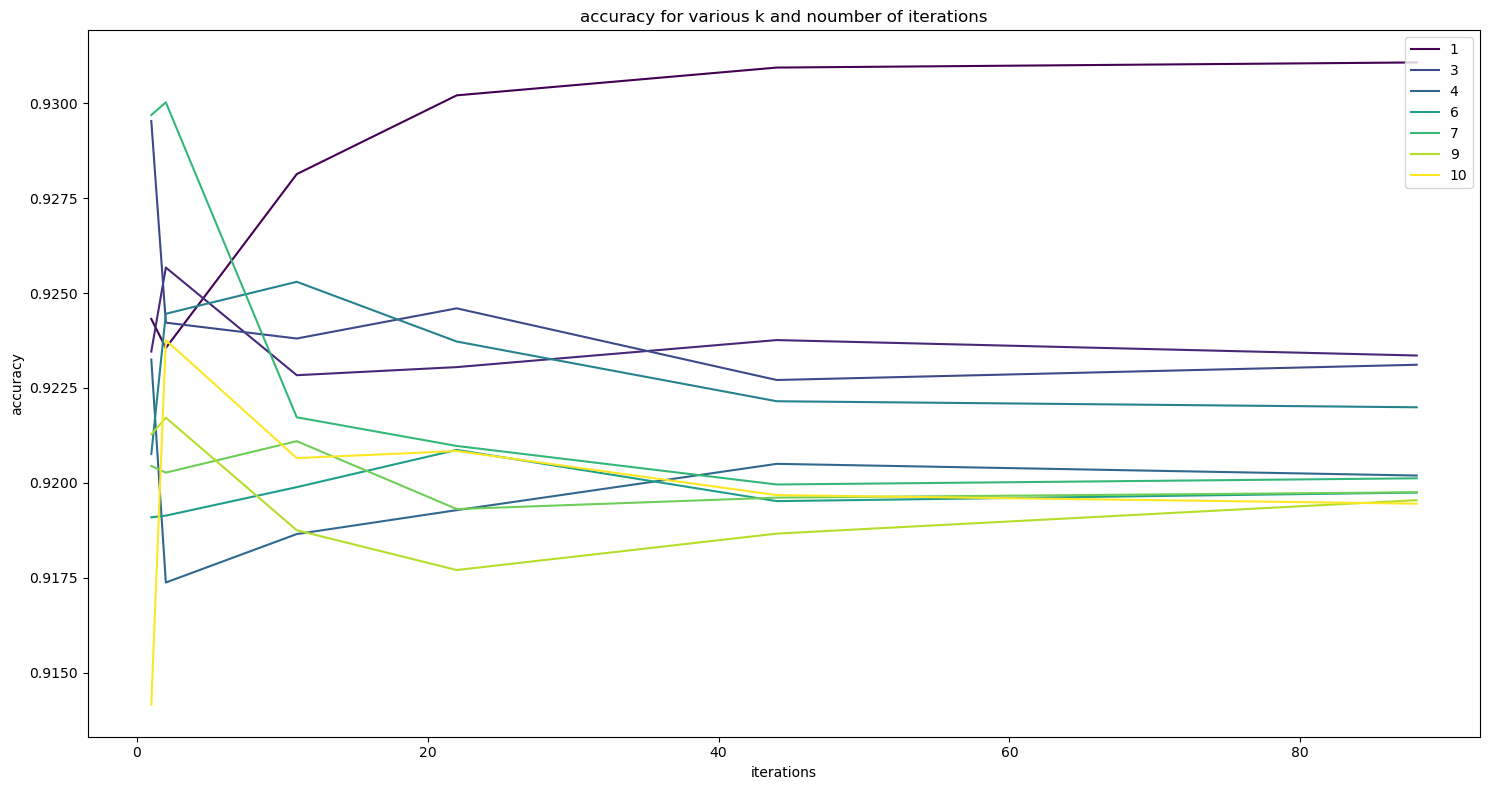

In [77]:
df = pd.DataFrame(res)

# plot with all k on one plot
plt.figure(figsize=(15, 8))
scatter = sns.lineplot(data=df, x='iterations', y='acc', hue='k', palette='viridis')
plt.title('accuracy for various k and noumber of iterations')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


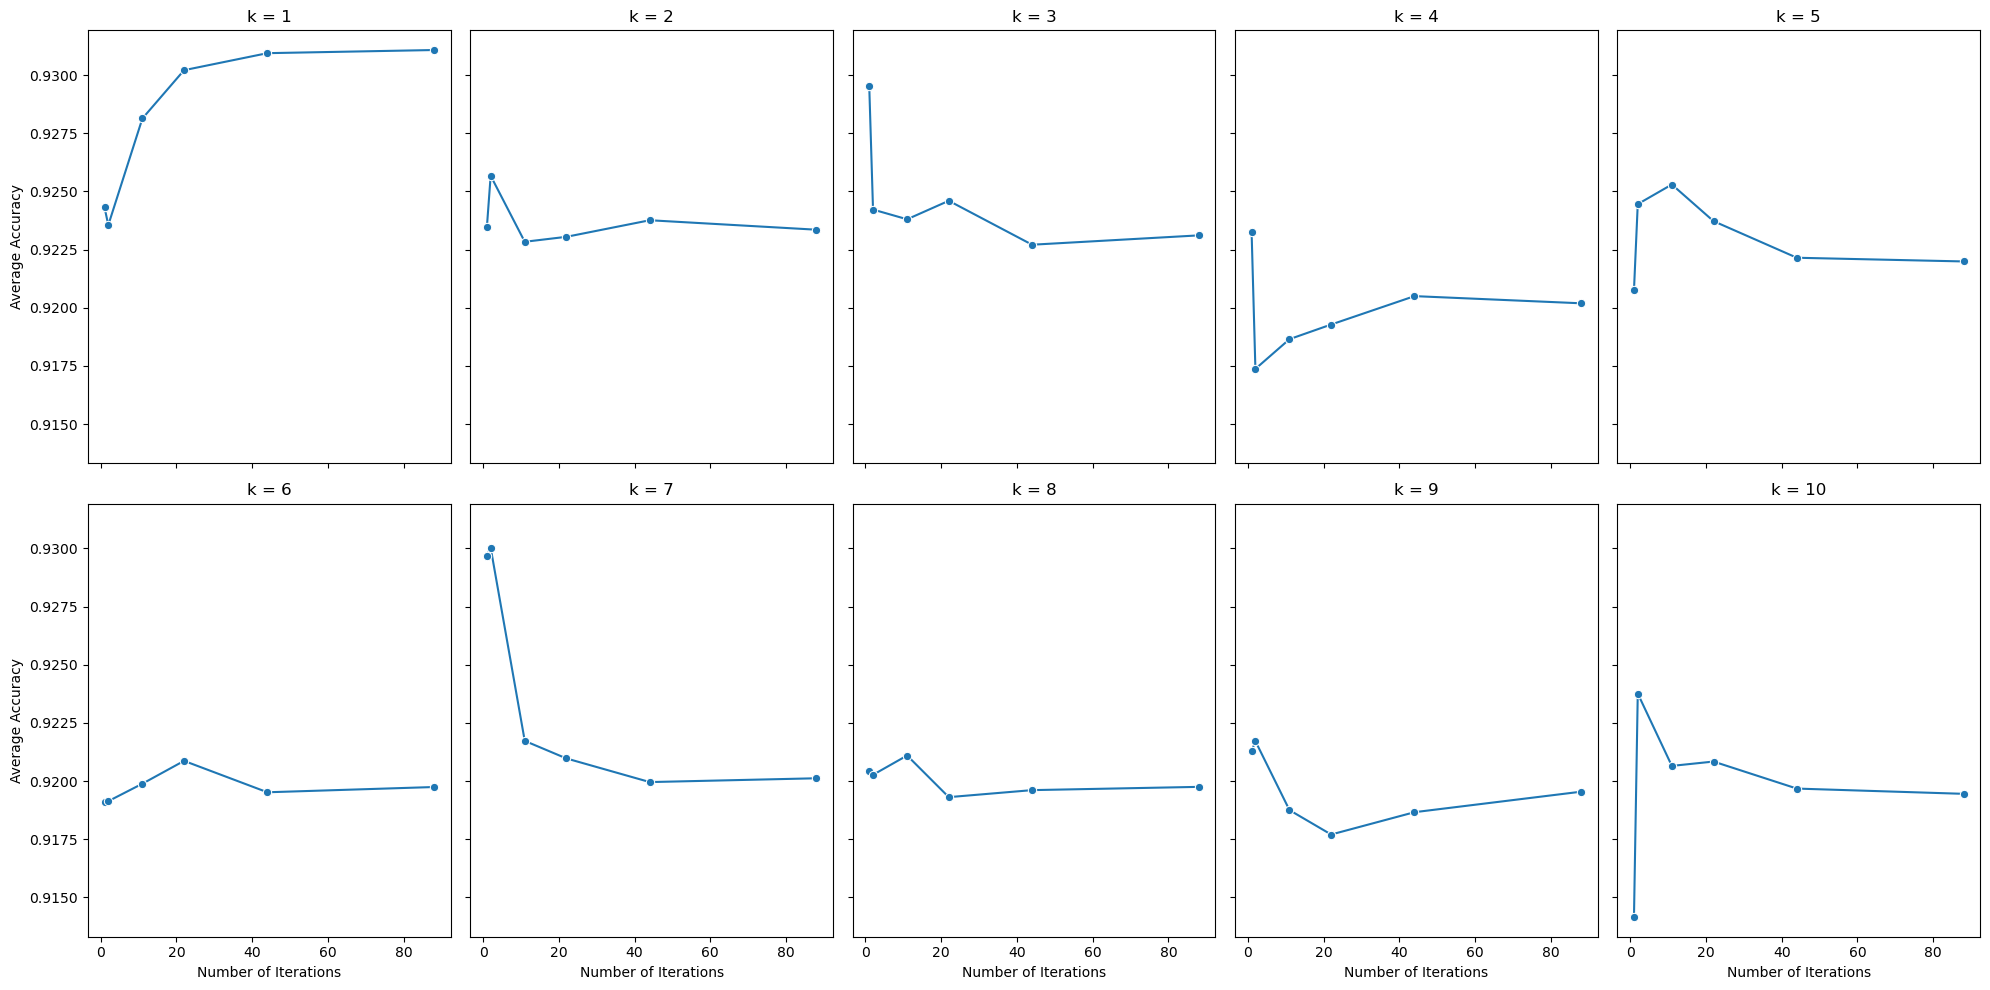

In [78]:
# plot with each k in a separated subplot 
rows = 2
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.flatten()

for ax, k in zip(axes, ks):
    sns.lineplot(data=df[df['k'] == k], x='iterations', y='acc', marker='o', ax=ax)
    
    ax.set_title(f'k = {k}')
    ax.set_xlabel('Number of Iterations')
    ax.set_ylabel('Average Accuracy')

plt.tight_layout()
plt.show()

### results

Plots shows that the best value for k is equal to 1 and it's enough to make ony 44 iterations